[Timothy Kam](https://github.com/phantomachine)

# Purpose

This follows up from the previous notebook: [Stochastic Growth and Irrreversible Investment](https://github.com/phantomachine/SPADES/blob/master/sgpc/Stochastic%20Growth%20and%20Irreversible%20Investment.ipynb). (``sgpc``) 

* In that notebook we illustrated the usage of *local polynomial sparse grid rules*.

* We used it to solve a stochastic growth model with a non-negativity constraint on investment flow.



This notebook:

1. uses the same ``sgpc`` model example;

2. compares alternative local polynomial grid rules with alternative levels of **sparsity** ($L$ or ``Depth``) and maximal approximant-polynomial **orders** (``Order``). 

    * The grids are currently *isotropic* (have the same level of sparsity in all dimensions).
    
3. compares simple, one-period Euler-equation approximation error analyses.

## Local polynomial grids

Local polynomial grids are built up from equidistant points. Their associated polynomial basis functions have support restricted to a neighborhood of each point. The usage here is similar to what is known as *finite element methods*.

We employed *local polynomial grids* in this example because:

1. The local support of the functions permit the use of locally adaptive approximation schemes.

2. This means that local grids are suitable for approximating functions with "sharp behavior", e.g., when it can exhibit gradients that change rapidly. 

Like global grids, local grids are constructed from tensors of one-dimensional points and basis functions. However, compared to global grids, local grids use functions with local support and very strict hierarchy. 

# Initial steps

We first import the module called ``main.py``. 

* This module provides a self-contained function to execute and solve a parametric instance of our model ``sgpc``. 

In [1]:
import main
import matplotlib.pyplot as plt 
import numpy as np

# Alternative grid denseness and error analysis

Here we will experiment a little with alternative levels (the parameter $L$ in the ``TASMANIAN`` [mathematical notes](https://tasmanian.ornl.gov/manuals.html)). 

In our application, this is ``L_all`` which defines the sparsity of the domain for function approximations.

We'll disable the plotting option this time for each experiment's output by setting ``PLOT=False`` below.

In [2]:
Levels = [3, 4, 5, 6, 7]
out_levels = []

In [3]:
for idx_L, L in enumerate(Levels):
    print("Experiment (Level_all = %i)" %L)
    # To run default instance specified in MAIN.PY execute: main.run()
    results = main.run( σ=0.05,            # log(TFP) shock std deviation
                        TOL=1e-6,          # Convergence criterion
                        L_all=L,           # Current state-space: grid density (L)evel
                        Order_all=3,       #            Max. order of polynomial bases
                        LOAD_OLD=True,     # Load previously saved experiments' policies
                        PLOT=False,        # Plot each experiment's irf/sims results?
                        Display=False,     # Display each experiment's info
                       )
    # Store experiment's RESULTS (dict) into OUT (list)
    out_levels.append(results)

Experiment (Level_all = 3)
LOAD_OLD=True: Using old result as initial guess ...
Getting file from out/Depth-3-Order-3-Shock-2.npy
[ =-------------- ] 0.20% 1/500, error = 0.0000009520    
Solve_PEA_TimeIteration: Convergence w.r.t. TOL_value attained.


Elapsed time: 0.2699298858642578 seconds

Now saving results to .NPY file ...
diagnostics_EulerError:
	Currently performing 'informal' error diagnostic.
	Euler equation error (percentage consumption changes).
	Max. Euler (consumption) error = 14.75149 percent
	Mean Euler (consumption) error = 1.67863 percent
[ =============== ] 100.00% 1199/1199, error = 0.0000000000    
	Burn-in sims. of length BURN=1000 discarded ...
Experiment (Level_all = 4)
LOAD_OLD=True: Using old result as initial guess ...
Getting file from out/Depth-4-Order-3-Shock-2.npy
[ =-------------- ] 0.20% 1/500, error = 0.0000006347    
Solve_PEA_TimeIteration: Convergence w.r.t. TOL_value attained.


Elapsed time: 0.6779649257659912 seconds

Now saving results to .NPY 

L = 3 : Max. Euler Error = 14.751490
L = 4 : Max. Euler Error = 7.918913
L = 5 : Max. Euler Error = 3.398636
L = 6 : Max. Euler Error = 4.005213
L = 7 : Max. Euler Error = 3.828905

Note: Errors measured in percentage consumption change


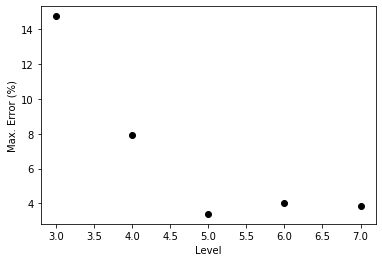

In [4]:
plt.figure()
for idx_L, level in enumerate(Levels):
    max_error = 100*out_levels[idx_L]["diagnostics"][0]
    plt.plot(level, max_error, 'ok')
    print("L = %i : Max. Euler Error = %0.6f" %(level, max_error))
print("\nNote: Errors measured in percentage consumption change")
plt.xlabel("Level")
plt.ylabel("Max. Error (%)")
plt.show()

# Alternative polynomial order and error analysis

Here we will experiment a little with alternative maximal ``Order`` for local polynomials approximant bases.

Local polynomials are hierarchically defined around each local grid neighborhood. ``Order`` limits the largest polynomial order for all these local polynomials.

In [5]:
Order = [1, 3, 5, 7]
out_order = []

We'll disable the plotting option this time for each experiment's output by setting ``PLOT=False`` below.

In [6]:
for idx_Order, order in enumerate(Order):
    print("Experiment (Order = %i)" %order)
    # To run default instance specified in MAIN.PY execute: main.run()
    results = main.run( σ=0.05,            # log(TFP) shock ϵation
                        TOL=1e-6,          # Convergence criterion
                        L_all = 5,         # Current state-space: grid density (L)evel
                        Order_all = order, #            Max. order of polynomial bases
                        LOAD_OLD = True,  # Load previously saved exp.func. array?
                        PLOT = False,      # Plot each experiment's irf/sims results?
                        Display=False,     # Display each experiment's info
                       )
    # Store experiment's RESULTS (dict) into OUT (list)
    out_order.append(results)

Experiment (Order = 1)
LOAD_OLD=True: Using old result as initial guess ...
Getting file from out/Depth-5-Order-1-Shock-2.npy
[ =-------------- ] 0.20% 1/500, error = 0.0000007967    
Solve_PEA_TimeIteration: Convergence w.r.t. TOL_value attained.


Elapsed time: 1.7385609149932861 seconds

Now saving results to .NPY file ...
diagnostics_EulerError:
	Currently performing 'informal' error diagnostic.
	Euler equation error (percentage consumption changes).
	Max. Euler (consumption) error = 5.59877 percent
	Mean Euler (consumption) error = 0.24459 percent
[ =============== ] 100.00% 1199/1199, error = 0.0000000000    
	Burn-in sims. of length BURN=1000 discarded ...
Experiment (Order = 3)
LOAD_OLD=True: Using old result as initial guess ...
Getting file from out/Depth-5-Order-3-Shock-2.npy
[ =-------------- ] 0.20% 1/500, error = 0.0000006876    
Solve_PEA_TimeIteration: Convergence w.r.t. TOL_value attained.


Elapsed time: 1.9270012378692627 seconds

Now saving results to .NPY file ...


Order = 1 : Max. Euler Error = 5.598775
Order = 3 : Max. Euler Error = 3.398742
Order = 5 : Max. Euler Error = 3.388556
Order = 7 : Max. Euler Error = 3.388556

Note: Errors measured in percentage consumption change


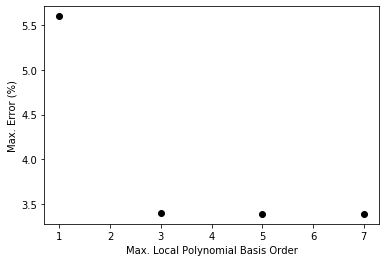

In [8]:
plt.figure()
for idx_Order, order in enumerate(Order):
    max_error = 100*out_order[idx_Order]["diagnostics"][0]
    print("Order = %i : Max. Euler Error = %0.6f" %(order, max_error))
    plt.plot(order, max_error, 'ok')
print("\nNote: Errors measured in percentage consumption change")
plt.xlabel("Max. Local Polynomial Basis Order")
plt.ylabel("Max. Error (%)")
plt.show()